

# Project: Investigate a Dataset: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The following report will attempt to investigate and highlight the association or correlation between different patients’ characteristics and the probability that they will show to the scheduled appointment or not through answering the below questions where the dependent variable will be the "No Show " Factor 

#### Guide Questions:
##### - To What extent Age group is correlated with not showing or showing to the scheduled appointment
##### - To What extent Gender is correlated with not showing or showing to the scheduled appointment
##### - To What extent Scholarship status is correlated with patients not showing or showing to the scheduled appointment
##### - To What extent Receiving SMS or not is correlated with patients not showing or showing to the scheduled appointment
####  - Do any of the tracked pre-existing conditions "such as Alcoholism" is associated with "No Show"









In [1]:
# importing packages 
import numpy as nb 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Magic fucntion
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
#### Data is loaded from an imported .CSV file

### General Properties

#### - No-show column will be populated as "Yes" if patient didnt show for the appointment and "No" if patient showed for the appointment 
#### - Scholarship column indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
#### - Neighborhood column indicates the location of the hospital.

In [2]:
# Importing data .CSV 
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# load data head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#shape to check number of patients and columns 
df.shape

(110527, 14)

In [4]:
# showing info to identify data types also to initially see if there are missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# Describe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#From the aboce describe can see Age have -1 value needs to be counted and removed
(df["Age"] < 0).sum()

1


### Data Cleaning (No-show appointments.CSV)

#### change all headers to small letters for ease to call later on 
#### replace "-" in "No-show" by "_" for consistency 
#### No NaN values are found 
#### No Duplicated values are found 
#### drop unused data columns "Too specific data ex Patient ID"
#### cleane age values < 0 
#### convert F//M to Female//Male in gender



In [8]:
#converting to lower case
df.columns = df.columns.str.lower()

In [9]:
#replace "-" in "No-show" by "_" for consistency
df.columns = df.columns.str.replace("-", "_")
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# removing the -1 age 
df["age"].replace({-1 : 0}, inplace=True)

In [11]:
# confirming the change 
(df["age"] < 0).sum()

0

In [12]:
# converting F//M to Female//Male
df["gender"].replace({"F" : "Female"}, inplace=True)
df["gender"].replace({"M" : "Male"}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# dropping unused data columns with too specific details 
df.drop(["patientid", 'appointmentid',"scheduledday","appointmentday"], axis=1, inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,Male,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,Female,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,Female,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,Female,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

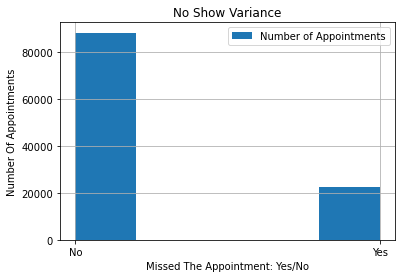

In [14]:
#hist showing no show vs show 

df.no_show.hist(bins = 5)
plt.title('No Show Variance')
plt.xlabel('Missed The Appointment: Yes/No' )
plt.ylabel('Number Of Appointments')
plt.legend(["Number of Appointments"]);

#### A Histogram showing no shows VS shows to give prospective on how many fulfiled appointments, and as represented more than quarter of appointments are missed by patients 

## Correlation between different patients’ characteristics and the probability that they will show to the scheduled appointment or not 

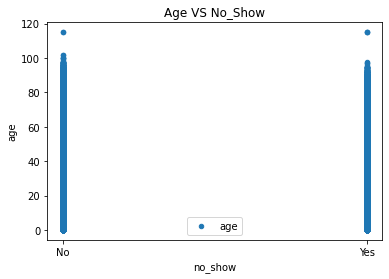

In [15]:
#Age vs no show
df.plot(x="no_show", y="age", kind="scatter", label = "age")
plt.legend()
plt.title('Age VS No_Show');



#### As represented a very slight correlation is observed in higher age groups and "no show"

gender  no_show
Female  No         57246
        Yes        14594
Male    No         30962
        Yes         7725
dtype: int64

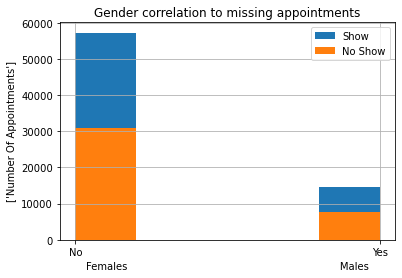

In [16]:
#gender vs no show
df.groupby("gender").no_show.hist(bins = 5)
plt.title('Gender correlation to missing appointments')
plt.xlabel('Females                                                                    Males' )
plt.ylabel(['Number Of Appointments'])
plt.legend(["Show", 'No Show']);
df.groupby(["gender", "no_show"]).size()


#### As presented females missed slightly higher percentage of their appointments than males

hipertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
dtype: int64

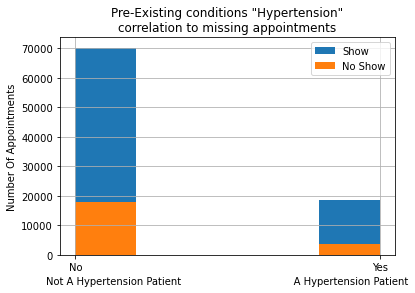

In [17]:
df.groupby("hipertension").no_show.hist(bins = 5)
plt.title('Pre-Existing conditions "Hypertension"\ncorrelation to missing appointments')
plt.xlabel(                         'Not A Hypertension Patient                                    A Hypertension Patient' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["hipertension", "no_show"]).size()

#### It is observed that patients with preexisting hypertension inclined more not to miss their appointments 

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
dtype: int64

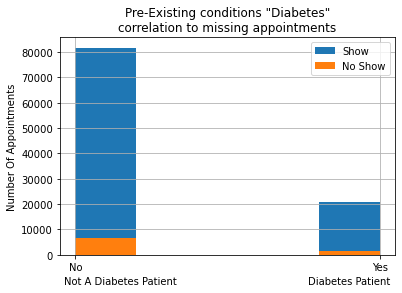

In [18]:
df.groupby("diabetes").no_show.hist(bins = 5)
plt.title('Pre-Existing conditions "Diabetes"\ncorrelation to missing appointments')
plt.xlabel(                   'Not A Diabetes Patient                                          Diabetes Patient' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["diabetes", "no_show"]).size()


#### It is observed that patients with pre-existing diabetes are slightly more inclined not to miss their appointments

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
dtype: int64

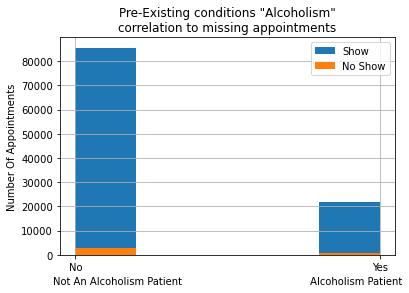

In [19]:
df.groupby("alcoholism").no_show.hist(bins = 5)
plt.title('Pre-Existing conditions "Alcoholism"\ncorrelation to missing appointments')
plt.xlabel(                    'Not An Alcoholism Patient                                         Alcoholism Patient' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["alcoholism", "no_show"]).size()

#### It is observed alcoholism is not associated with an increased inclination to miss appointments 

gender  no_show
Female  No         57246
        Yes        14594
Male    No         30962
        Yes         7725
dtype: int64

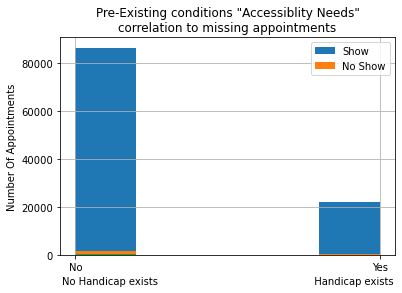

In [20]:
df.groupby("handcap").no_show.hist(bins = 5);
plt.title('Pre-Existing conditions "Accessiblity Needs"\ncorrelation to missing appointments')
plt.xlabel(           'No Handicap exists                                                  Handicap exists' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["gender", "no_show"]).size()


#### It is observed thant handicap doesnt have any significant impact on no show 

## Correlation between other factors and the probability that they will show to the scheduled appointment or not 


sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
dtype: int64

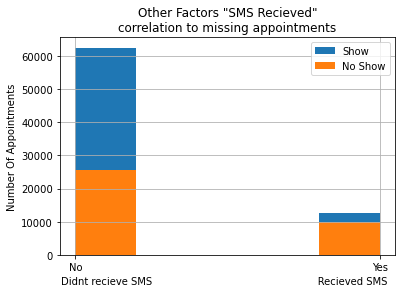

In [21]:
df.groupby("sms_received").no_show.hist(bins = 5);
plt.title('Other Factors "SMS Recieved"\ncorrelation to missing appointments')
plt.xlabel(                  'Didnt recieve SMS                                                     Recieved SMS  ' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["sms_received", "no_show"]).size()

#### Patients who have received SMS have a higher percentage missing their appointments 

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

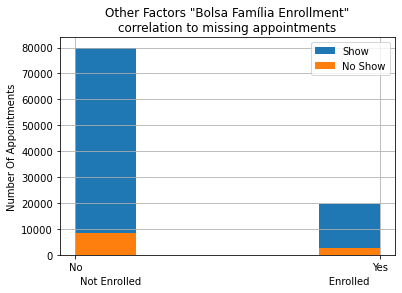

In [22]:
df.groupby("scholarship").no_show.hist(bins = 5)
plt.title('Other Factors "Bolsa Família Enrollment"\ncorrelation to missing appointments')
plt.xlabel(              'Not Enrolled                                                            Enrolled  ' )
plt.ylabel('Number Of Appointments')
plt.legend(["Show", 'No Show']);
df.groupby(["scholarship", "no_show"]).size()

#### Patients who are enrolled in the Brasilian welfare program Bolsa Família. seem to be more inclined to miss their appointments 

<a id='conclusions'></a>
## Conclusions

### Based on the above observation we can note the below
#### - Patients with certain pre-existing conditions (diabetes,hypertension) have lower probability missing their appointments 
#### - Older age groups have a slight higher probability to miss their appointments
#### - Patients who are enrolled in the Brasilian welfare program Bolsa Família. seem to be more inclined to miss their appointments, a revision to this program could mitigate this issue to find the root cause
#### - Patients who have received SMS have a higher percentage missing their appointments, a review of the SMS system could mitigate this and fix any SMS issues or defects that could be leading patients to miss their appointments
#### - Gender don't seem to be a large factor in missing appointments

### Limitations:
#### - handcap data is not elaborated as what is meant by values (1-4)

